# Cell-group/type specific analysis
## 1. Unsupervised cell group deconvolution gene expression
Array data: 8 cell groups, 31947 expressed genes, 642 subjects

In [1]:
library(data.table)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
load("~/project-gandalm/isoform_twas/eqtl_new/data/cell_specific/capstonex_swcam.RData")

In [2]:
ls()

[1] "gene_names"   "sample_names" "Swest"

In [3]:
dim(Swest)

[1]     8 31947   642

In [4]:
length(gene_names)
length(sample_names)

[1] 31947

[1] 642

In [5]:
# subject 1
head(Swest[,,1])

1.593735525,13.210791713,1.695793e+01,3.790269e+00,0.7415379,1.804634e-03,1.337887e-04,0.000000e+00,0.0000,1.279865e-02,⋯,362.9641567,119.4771184,7.6272622,4.8265640,2.612935e-01,0.00,22.363621,0.23423905,0.00000,1.410054e-04
25.341752828,0.592241144,1.383446e+01,1.185697e+02,42.4143679,1.987727e+02,9.774441e+02,0.000000e+00,663.7625,1.035407e+02,⋯,1595.5699870,3.4121958,157.3948445,1.7183498,4.285146e+04,19462.56,85.141626,19.15272518,0.00000,1.957894e+02
7.981430260,3.991151913,2.223229e+02,9.886584e+00,0.1429660,4.362046e+00,6.211518e+01,0.000000e+00,0.0000,0.000000e+00,⋯,496.3374195,444.1632880,165.1692251,361.8891802,0.000000e+00,0.00,9.634614,3.07860141,0.00000,4.751962e+00
0.007902527,7.191935891,8.999644e+00,1.939068e-03,0.5674018,3.597616e+01,2.885313e-04,4.582330e-04,0.0000,0.000000e+00,⋯,592.6700909,526.8492992,938.8587785,23.4068560,1.106552e-01,11770.02,6.795791,11.94207307,692.57986,0.000000e+00
12.030165444,0.241691991,2.189722e+03,1.846771e+01,11.4698082,8.833250e+01,1.439256e-03,1.651613e+02,357.6743,4.617845e-05,⋯,1892.8680689,3189.5014148,3395.3489370,449.1549191,2.487943e-01,20254.17,111.283321,0.06494554,10.28376,4.223485e-04
0.225706399,0.009953444,3.935862e-02,8.133794e+00,60.3961944,4.927227e-04,2.467898e-04,0.000000e+00,214.9436,1.193565e-05,⋯,0.2193752,0.8955288,0.1169844,0.8938108,0.000000e+00,0.00,54.886849,0.03687853,0.00000,0.000000e+00


In [6]:
# CG1
head(Swest[1,,])
dim(Swest[1,,])

1.593735525,0.5757932,0.6733696,0.428955126,1.544791969,1.462541e+00,8.824562e-01,0.29489726,0.2088750,0.922511690,⋯,1.134120,1.4041575,9.221299e-01,0.9183374,1.451968,0.589588527,1.3897439,1.225086e+00,1.8400158,0.008214294
13.210791713,13.3787582,13.4402809,14.228248656,13.280814617,1.372414e+01,1.342306e+01,13.69468128,13.0172879,13.456882403,⋯,13.426474,13.6908391,1.333055e+01,13.1066145,12.111800,13.352635996,13.6153565,1.332438e+01,14.1773284,14.078295909
16.957932054,3.1761137,4.6396993,13.635787418,8.989648936,9.132785e+00,3.974638e+00,6.17830142,20.4091618,6.999728146,⋯,0.000000,0.0000000,6.624669e+00,6.8140337,4.131963,3.900622661,1.7687943,1.329156e+00,9.7541545,11.893766287
3.790268853,3.2754750,1.7919163,4.487045425,3.768512693,4.424894e+00,2.011438e+00,4.45440185,0.7522046,0.000000000,⋯,6.010018,8.9627005,4.070839e+00,6.9566748,7.709381,2.954487723,5.3844180,2.980476e+00,0.9677290,3.588351888
0.741537886,0.4400971,0.1373164,0.349789744,0.426776196,5.853488e-01,1.555647e-01,0.17355937,0.8402469,0.175083390,⋯,0.135318,0.3075148,4.604924e-01,0.6164881,1.127885,0.256581264,0.2373374,1.916504e-01,0.1315022,0.279577055
0.001804634,0.0000000,0.0000000,0.001315279,0.001628397,5.622031e-04,8.749367e-04,0.00107084,0.0000000,0.002234233,⋯,0.000000,0.0000000,5.601853e-04,0.0000000,0.000000,0.001189834,0.0000000,1.681145e-04,0.0000000,0.000000000


[1] 31947   642

In [3]:
for(i in 1:8){
    df <- paste0("CG_",i)
    df_log <- paste0("CG_log_", i)
    assign(df, Swest[i,,])
    assign(df_log, log2(.1+Swest[i,,]))
}

### Now visualize gene expression (normalized, and ComBat. Still need to log2 transform as Swest output is linear)

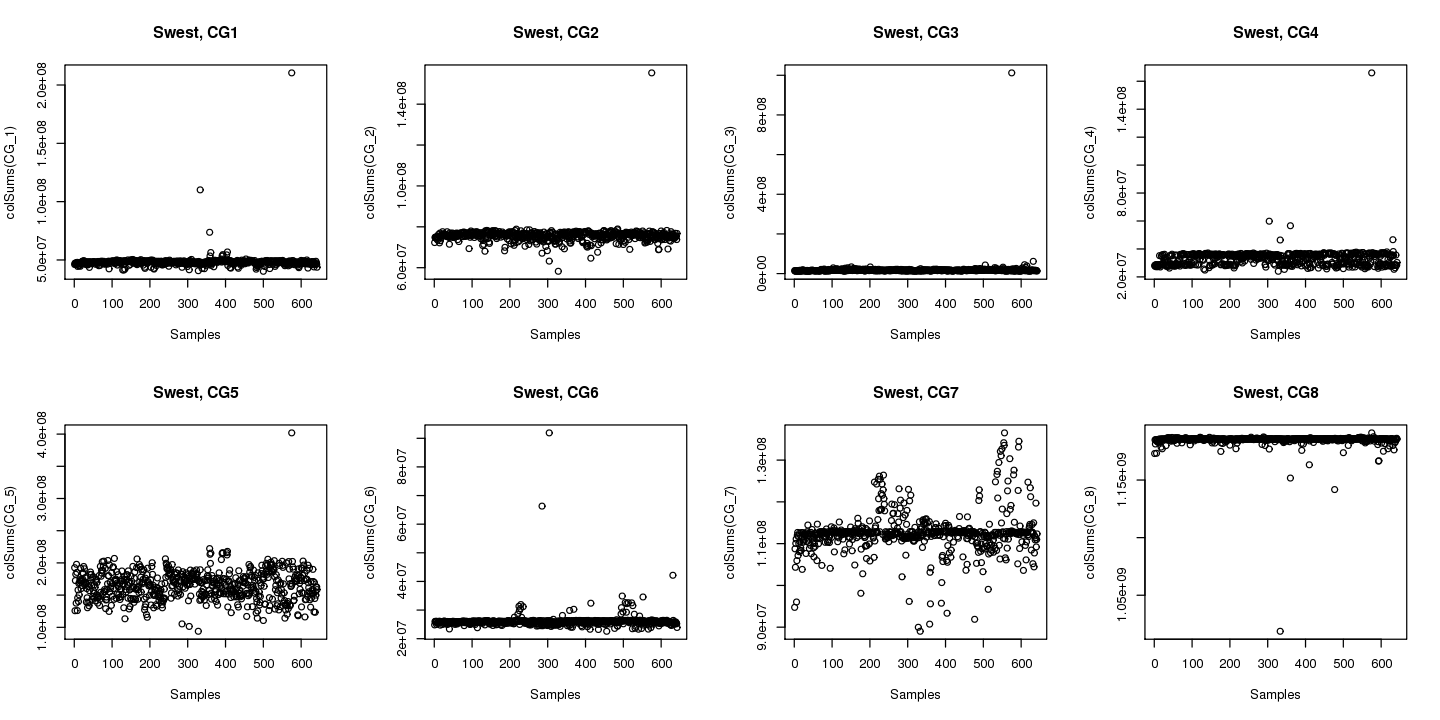

In [52]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(2,4))
plot(colSums(CG_1), main = "Swest, CG1", xlab= "Samples")
plot(colSums(CG_2), main = "Swest, CG2", xlab= "Samples")
plot(colSums(CG_3), main = "Swest, CG3", xlab= "Samples")
plot(colSums(CG_4), main = "Swest, CG4", xlab= "Samples")
plot(colSums(CG_5), main = "Swest, CG5", xlab= "Samples")
plot(colSums(CG_6), main = "Swest, CG6", xlab= "Samples")
plot(colSums(CG_7), main = "Swest, CG7", xlab= "Samples")
plot(colSums(CG_8), main = "Swest, CG8", xlab= "Samples")

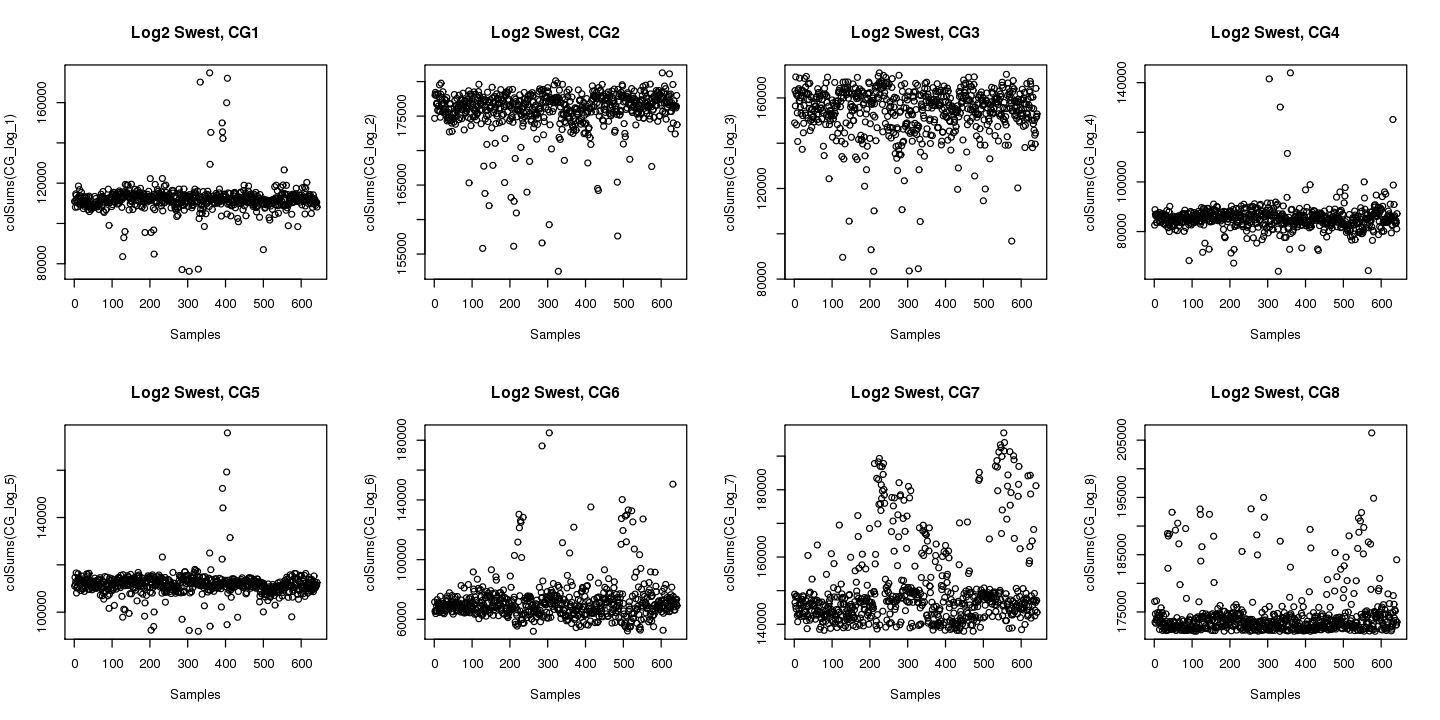

In [58]:
par(mfrow=c(2,4))
plot(colSums(CG_log_1), main = "Log2 Swest, CG1", xlab= "Samples")
plot(colSums(CG_log_2), main = "Log2 Swest, CG2", xlab= "Samples")
plot(colSums(CG_log_3), main = "Log2 Swest, CG3", xlab= "Samples")
plot(colSums(CG_log_4), main = "Log2 Swest, CG4", xlab= "Samples")
plot(colSums(CG_log_5), main = "Log2 Swest, CG5", xlab= "Samples")
plot(colSums(CG_log_6), main = "Log2 Swest, CG6", xlab= "Samples")
plot(colSums(CG_log_7), main = "Log2 Swest, CG7", xlab= "Samples")
plot(colSums(CG_log_8), main = "Log2 Swest, CG8", xlab= "Samples")

### Load bulk BED, write CG1-8 BED files 

In [4]:
bulk <- fread("~/project-gandalm/isoform_twas/eqtl_new/data/gene.counts.scaled.normalized.bed.gz", data.table = F)

In [30]:
head(bulk)

,#Chr,start,end,ID,1474,1496,1500,1502,1507,1511,⋯,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,11868,11869,ENSG00000223972,3.135499,3.860746,2.991053,3.402323,1.683311,2.979528,⋯,3.545430,2.794408,3.219573,3.270080,3.033587,3.719546,3.528669,1.795879,1.795879,1.795879
2,1,29553,29554,ENSG00000243485,2.019259,2.019259,3.337607,3.284138,2.019259,4.117352,⋯,1.739895,1.739895,3.364551,2.579396,3.357388,2.792396,2.825834,3.070580,3.492360,2.796174
3,1,29569,29570,ENSG00000227232,7.976420,7.983908,8.418516,8.327781,7.848723,8.723322,⋯,6.898168,8.165533,9.093119,7.508564,8.412931,8.818620,7.683092,8.549899,7.261408,7.765424
4,1,36080,36081,ENSG00000237613,3.965445,4.274929,4.684834,4.872262,4.790440,3.521006,⋯,2.993636,4.926470,2.993636,2.993636,2.993636,2.993636,2.993636,5.123510,2.993636,2.993636
5,1,91104,91105,ENSG00000239945,1.850485,3.306370,2.977209,3.985883,1.850485,1.850485,⋯,2.157703,2.157703,2.157703,3.728385,5.165983,3.846017,2.157703,2.157703,2.157703,4.511053
6,1,131024,131025,ENSG00000233750,4.110258,4.971833,4.274072,4.756833,5.022698,3.450271,⋯,4.431115,4.068149,4.380002,3.577251,3.459137,4.259683,3.918486,3.981142,4.821110,5.015399


In [31]:
# sample_names do not have subject IDs
# check if gene_names are in the same order as bulk file
sum(bulk$ID == gene_names)

[1] 31947

In [5]:
cgs <- list(CG_log_1, CG_log_2, CG_log_3, CG_log_4, CG_log_5, CG_log_6, CG_log_7, CG_log_8)
for (i in seq_along(cgs)) {
    colnames(cgs[[i]]) <- colnames(bulk)[5:646]
    cgs[[i]] <- cbind(bulk[,1:4], cgs[[i]])
}

In [60]:
head(CG_log_1)

0.7602086,-0.5653462,-0.3707701,-0.9187828,0.7179051,0.6438944,-0.025535,-1.340451,-1.69490502,0.03211734,⋯,0.3034827,0.5889557,0.03157862,0.02621558,0.6340989,-0.5361923,0.5750644,0.4060862,0.95606841,-3.208037
3.7345245,3.7526157,3.7591858,3.8407904,3.7420940,3.7891180,3.757350,3.786040,3.71339756,3.76095354,⋯,3.7577139,3.7856383,3.74744641,3.72318878,3.6102040,3.7498170,3.7777202,3.7467838,3.83565414,3.825612
4.0923709,1.7119854,2.2447955,3.7798677,3.1842246,3.2067659,2.026672,2.650374,4.35819662,2.82776378,⋯,-3.3219281,-3.3219281,2.74946322,2.78952764,2.0813269,2.0002246,0.9021078,0.5151638,3.30073209,3.584213
1.9598699,1.7550906,0.9198483,2.1975652,1.9517790,2.1778840,1.078226,2.187262,-0.23072831,-3.32192809,⋯,2.6111767,3.1799410,2.06033760,2.81898852,2.9652081,1.6109304,2.4553385,1.6231531,0.09454552,1.882976
-0.2488999,-0.8887093,-2.0751165,-1.1526773,-0.9247379,-0.5450897,-1.968239,-1.870074,-0.08888849,-1.86205907,⋯,-2.0873167,-1.2950758,-0.83523340,-0.48098529,0.2961759,-1.4876972,-1.5677360,-1.7776880,-2.11090210,-1.397535
-3.2961249,-3.3219281,-3.3219281,-3.3030763,-3.2986245,-3.3138399,-3.309360,-3.306561,-3.32192809,-3.29004973,⋯,-3.3219281,-3.3219281,-3.31386888,-3.32192809,-3.3219281,-3.3048637,-3.3219281,-3.3195048,-3.32192809,-3.321928


In [61]:
head(cgs[[1]])

,#Chr,start,end,ID,1474,1496,1500,1502,1507,1511,⋯,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,11868,11869,ENSG00000223972,0.7602086,-0.5653462,-0.3707701,-0.9187828,0.7179051,0.6438944,⋯,0.3034827,0.5889557,0.03157862,0.02621558,0.6340989,-0.5361923,0.5750644,0.4060862,0.95606841,-3.208037
2,1,29553,29554,ENSG00000243485,3.7345245,3.7526157,3.7591858,3.8407904,3.7420940,3.7891180,⋯,3.7577139,3.7856383,3.74744641,3.72318878,3.6102040,3.7498170,3.7777202,3.7467838,3.83565414,3.825612
3,1,29569,29570,ENSG00000227232,4.0923709,1.7119854,2.2447955,3.7798677,3.1842246,3.2067659,⋯,-3.3219281,-3.3219281,2.74946322,2.78952764,2.0813269,2.0002246,0.9021078,0.5151638,3.30073209,3.584213
4,1,36080,36081,ENSG00000237613,1.9598699,1.7550906,0.9198483,2.1975652,1.9517790,2.1778840,⋯,2.6111767,3.1799410,2.06033760,2.81898852,2.9652081,1.6109304,2.4553385,1.6231531,0.09454552,1.882976
5,1,91104,91105,ENSG00000239945,-0.2488999,-0.8887093,-2.0751165,-1.1526773,-0.9247379,-0.5450897,⋯,-2.0873167,-1.2950758,-0.83523340,-0.48098529,0.2961759,-1.4876972,-1.5677360,-1.7776880,-2.11090210,-1.397535
6,1,131024,131025,ENSG00000233750,-3.2961249,-3.3219281,-3.3219281,-3.3030763,-3.2986245,-3.3138399,⋯,-3.3219281,-3.3219281,-3.31386888,-3.32192809,-3.3219281,-3.3048637,-3.3219281,-3.3195048,-3.32192809,-3.321928


In [62]:
for(i in 1:8){
    write.table(cgs[[i]], paste0("~/project-gandalm/isoform_twas/eqtl_new/data/cell_specific/swcam_CG_", i, ".bed"),
               col.names = T, row.names = F, quote = F, sep = "\t")
}

In [7]:
dim(cgs[[1]])

[1] 31947   646

### CG gene expression PCA (bulk gene expression outliers removed)

In [6]:
rel <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/related.txt", header = F, stringsAsFactors = F)[,1]

walker <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_walker.txt")
obrien <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_obrien.txt")
werling <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_werling.txt")
hdbr <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_hdbr.txt")
libd <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_libd.txt")

In [7]:
df1 <- cgs[[1]][,5:646]
df1 <- df1[,!names(df1) %in% rel]
dim(df1)
df2 <- cgs[[2]][,5:646]
df2 <- df2[,!names(df2) %in% rel]
dim(df2)
df3 <- cgs[[3]][,5:646]
df3 <- df3[,!names(df3) %in% rel]
dim(df3)
df4 <- cgs[[4]][,5:646]
df4 <- df4[,!names(df4) %in% rel]
dim(df4)
df5 <- cgs[[5]][,5:646]
df5 <- df5[,!names(df5) %in% rel]
dim(df5)
df6 <- cgs[[6]][,5:646]
df6 <- df6[,!names(df6) %in% rel]
dim(df6)
df7 <- cgs[[7]][,5:646]
df7 <- df7[,!names(df7) %in% rel]
dim(df7)
df8 <- cgs[[8]][,5:646]
df8 <- df8[,!names(df8) %in% rel]
dim(df8)

[1] 31947   629

[1] 31947   629

[1] 31947   629

[1] 31947   629

[1] 31947   629

[1] 31947   629

[1] 31947   629

[1] 31947   629

In [8]:
groups <- c()

for (i in 1:ncol(df1)) {
  sample <- colnames(df1)[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups_fac <- factor(groups)

In [9]:
s1 <- svd(df1- rowMeans(df1))
PC1_1 <- s1$d[1]*s1$v[,1]
PC2_1 <- s1$d[2]*s1$v[,2]
data_1 <- data.frame(PC1_1, PC2_1, "Data" = groups_fac)
s2 <- svd(df2- rowMeans(df2))
PC1_2 <- s2$d[1]*s2$v[,1]
PC2_2 <- s2$d[2]*s2$v[,2]
data_2 <- data.frame(PC1_2, PC2_2, "Data" = groups_fac)
s3 <- svd(df3- rowMeans(df3))
PC1_3 <- s3$d[1]*s3$v[,1]
PC2_3 <- s3$d[2]*s3$v[,2]
data_3 <- data.frame(PC1_3, PC2_3, "Data" = groups_fac)
s4 <- svd(df4- rowMeans(df4))
PC1_4 <- s4$d[1]*s4$v[,1]
PC2_4 <- s4$d[2]*s4$v[,2]
data_4 <- data.frame(PC1_4, PC2_4, "Data" = groups_fac)
s5 <- svd(df5- rowMeans(df5))
PC1_5 <- s5$d[1]*s5$v[,1]
PC2_5 <- s5$d[2]*s5$v[,2]
data_5 <- data.frame(PC1_5, PC2_5, "Data" = groups_fac)
s6 <- svd(df6- rowMeans(df6))
PC1_6 <- s6$d[1]*s6$v[,1]
PC2_6 <- s6$d[2]*s6$v[,2]
data_6 <- data.frame(PC1_6, PC2_6, "Data" = groups_fac)
s7 <- svd(df7- rowMeans(df7))
PC1_7 <- s7$d[1]*s7$v[,1]
PC2_7 <- s7$d[2]*s7$v[,2]
data_7 <- data.frame(PC1_7, PC2_7, "Data" = groups_fac)
s8 <- svd(df8- rowMeans(df8))
PC1_8 <- s8$d[1]*s8$v[,1]
PC2_8 <- s8$d[2]*s8$v[,2]
data_8 <- data.frame(PC1_8, PC2_8, "Data" = groups_fac)

In [11]:
dim(data_1)

[1] 629   3

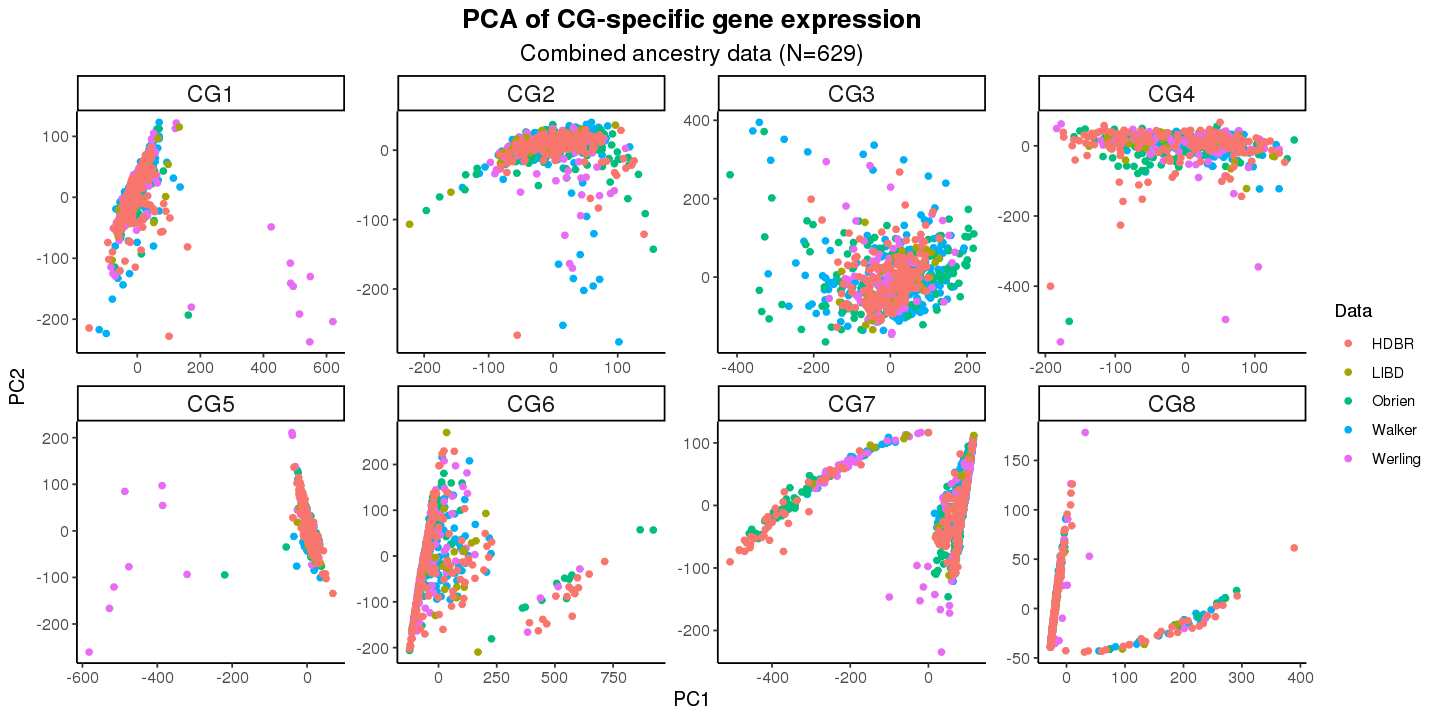

In [11]:
options(repr.plot.width=12, repr.plot.height=6)

colnames(data_1) <- colnames(data_2) <- colnames(data_3) <- colnames(data_4) <- colnames(data_5) <- colnames(data_6) <- colnames(data_7) <- colnames(data_8) <- c("PC1", "PC2", "Data")
data_all <- rbind(data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8)

data_all$group <- c(rep("CG1", 629), 
                    rep("CG2", 629),
                    rep("CG3", 629),
                    rep("CG4", 629),
                    rep("CG5", 629),
                    rep("CG6", 629),
                    rep("CG7", 629),
                    rep("CG8", 629))
p <- ggplot(data_all, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free", ncol=4) +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of CG-specific gene expression",
       subtitle = "Combined ancestry data (N=629)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p

In [12]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/CG_expr_PCA_study.png", p, width = 12, height = 6)

**By sex and age**

In [13]:
metadata <- read.table("~/project-gandalm/isoform_twas/eqtl_new/metadata_inferSex.tsv", header = T, stringsAsFactors = F)
head(metadata)

,Subject,Age,Sex,inferSex
,<chr>,<dbl>,<chr>,<chr>
1,HSB100,-0.4027397,F,F
2,HSB152,-0.4602740,M,M
3,HSB195,-0.4219178,M,M
4,HSB221,-0.4027397,F,F
5,HSB222,-0.4823288,F,F
6,HSB238,-0.4794521,F,F


In [14]:
subject_sex <- c()
subject_tri <- c()

for (i in 1:ncol(df1)) {
    sample <- colnames(df1)[i]
    # sex
    subject_sex[i] <- metadata[metadata$Subject == sample, "inferSex"]
    # age, PCW, trimester
    pcw <- metadata[metadata$Subject == sample, "Age"]*365/7+40 
    if (pcw < 13){
        subject_tri[i] <- 1
    }
    if (13 <= pcw & pcw < 28){
        subject_tri[i] <- 2
    }
    if (pcw >= 28){
        subject_tri[i] <- 3
    }
}

subject_sex <- factor(subject_sex)
subject_tri <- factor(subject_tri)

In [15]:
data_all$Sex <- rep(subject_sex, 8)
data_all$Trimester <- rep(subject_tri, 8)

In [16]:
head(data_all)

,PC1,PC2,Data,group,Sex,Trimester
,<dbl>,<dbl>,<fct>,<chr>,<fct>,<fct>
1,-66.93690,-49.766471,Walker,CG1,M,2
2,-17.56458,4.083882,Walker,CG1,F,2
3,-53.81240,-14.924274,Walker,CG1,M,2
4,-24.07763,-15.797881,Walker,CG1,M,2
5,-24.73479,-26.662644,Walker,CG1,M,2
6,-36.60527,-10.593135,Walker,CG1,M,2


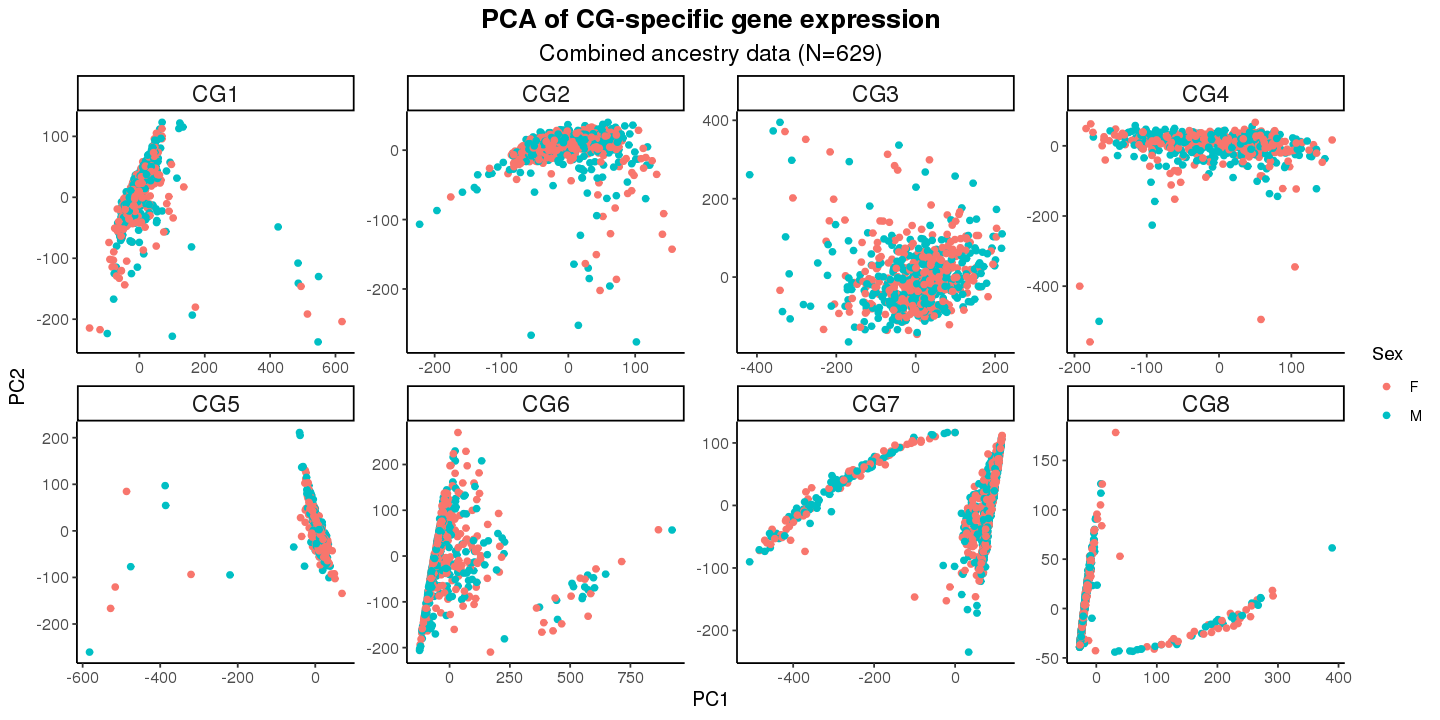

In [17]:
p <- ggplot(data_all, aes(x=PC1, y=PC2, color=Sex)) +
  geom_point() +
  facet_wrap(~group, scales = "free", ncol=4) +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of CG-specific gene expression",
       subtitle = "Combined ancestry data (N=629)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p

In [18]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/CG_expr_PCA_sex.png", p, width = 12, height = 6)

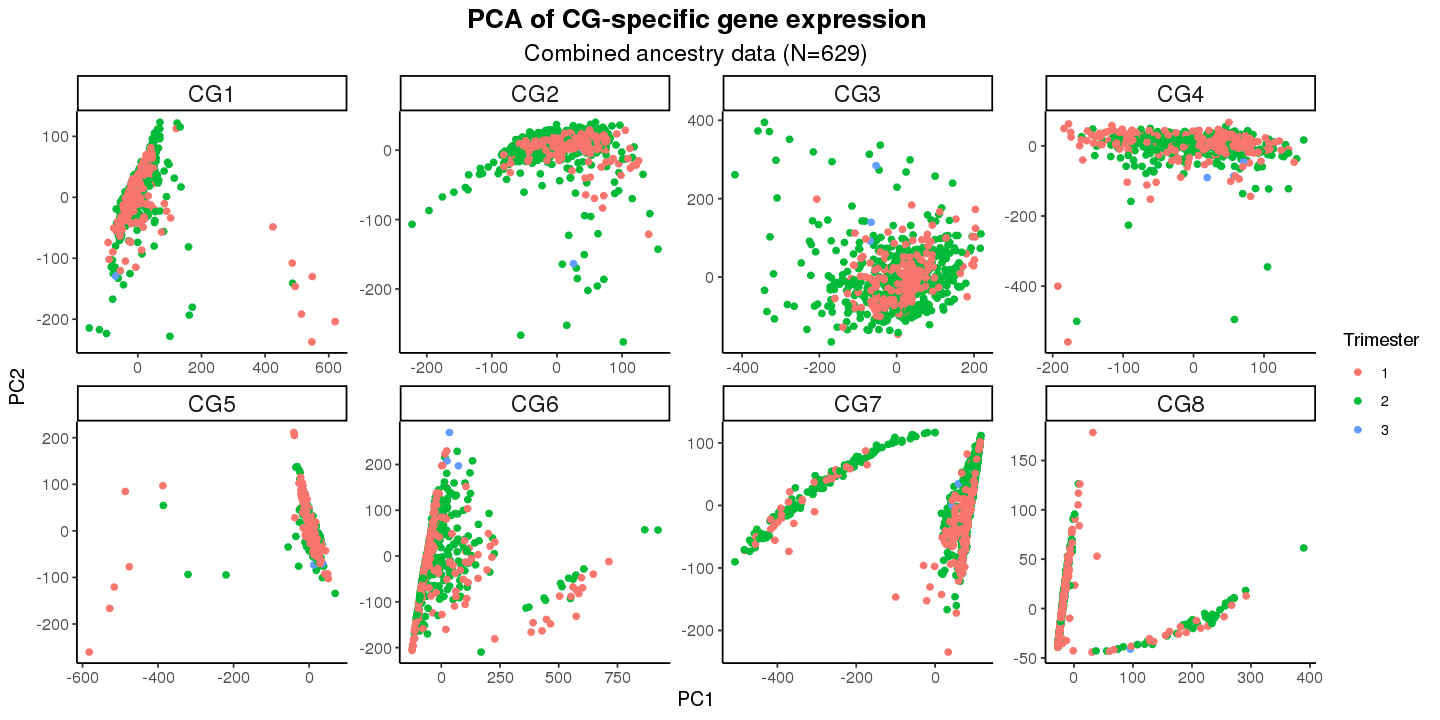

In [19]:
p <- ggplot(data_all, aes(x=PC1, y=PC2, color=Trimester)) +
  geom_point() +
  facet_wrap(~group, scales = "free", ncol=4) +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of CG-specific gene expression",
       subtitle = "Combined ancestry data (N=629)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p

In [20]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/CG_expr_PCA_trimester.png", p, width = 12, height = 6)

## 2. Decon-QTL input preparation

### Unsupervised cell group proportions `--cellcount`

In [21]:
prop <- fread("~/project-gandalm/isoform_twas/eqtl_new/data/cell_specific/fetalbrain_unsupervised_prop.csv", data.table = F)

In [22]:
head(prop)

,V1,CG1,CG2,CG3,CG4,CG5,CG6,CG7,CG8
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,V7,0.04017111,0.05003045,0.8433628,0.01809225,0.009991192,0.019233263,0.012685359,0.006433612
2,V8,0.03116547,0.07400348,0.7812348,0.04830811,0.048907356,0.009282987,0.005818009,0.001279827
3,V9,0.04861597,0.06171541,0.8205906,0.02089644,0.022517391,0.014239824,0.007700926,0.003723463
4,V10,0.08178062,0.06638560,0.7772764,0.03118620,0.024647407,0.010832914,0.006551114,0.001339696
5,V11,0.03725752,0.07767799,0.7847484,0.03960730,0.045230144,0.010722032,0.003115286,0.001641290
6,V12,0.03070350,0.03529335,0.8728747,0.01473825,0.008845729,0.018686553,0.011514965,0.007342982


In [23]:
prop <- prop[,-1]

In [37]:
head(prop)

,CG1,CG2,CG3,CG4,CG5,CG6,CG7,CG8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.04017111,0.05003045,0.8433628,0.01809225,0.009991192,0.019233263,0.012685359,0.006433612
2,0.03116547,0.07400348,0.7812348,0.04830811,0.048907356,0.009282987,0.005818009,0.001279827
3,0.04861597,0.06171541,0.8205906,0.02089644,0.022517391,0.014239824,0.007700926,0.003723463
4,0.08178062,0.06638560,0.7772764,0.03118620,0.024647407,0.010832914,0.006551114,0.001339696
5,0.03725752,0.07767799,0.7847484,0.03960730,0.045230144,0.010722032,0.003115286,0.001641290
6,0.03070350,0.03529335,0.8728747,0.01473825,0.008845729,0.018686553,0.011514965,0.007342982


In [38]:
rownames(prop) <- colnames(bulk)[5:646]
prop <- prop[!rownames(prop) %in% rel, ]

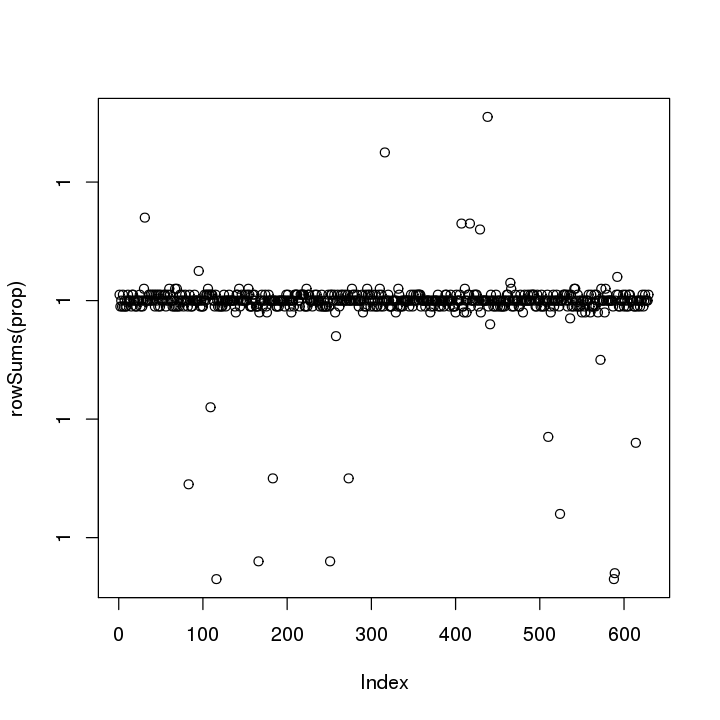

In [39]:
options(repr.plot.width=6, repr.plot.height=6)
plot(rowSums(prop))

In [40]:
head(prop)

,CG1,CG2,CG3,CG4,CG5,CG6,CG7,CG8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1474,0.04017111,0.05003045,0.8433628,0.01809225,0.009991192,0.019233263,0.012685359,0.006433612
1496,0.03116547,0.07400348,0.7812348,0.04830811,0.048907356,0.009282987,0.005818009,0.001279827
1500,0.04861597,0.06171541,0.8205906,0.02089644,0.022517391,0.014239824,0.007700926,0.003723463
1502,0.08178062,0.06638560,0.7772764,0.03118620,0.024647407,0.010832914,0.006551114,0.001339696
1507,0.03725752,0.07767799,0.7847484,0.03960730,0.045230144,0.010722032,0.003115286,0.001641290
1511,0.03070350,0.03529335,0.8728747,0.01473825,0.008845729,0.018686553,0.011514965,0.007342982


**For Decon-eQTL the cellcounts have to be scaled to sum to 100**

In [25]:
prop.scaled <- (prop/rowSums(prop))*100

In [26]:
rownames(prop.scaled) <- colnames(bulk)[5:646]
head(prop.scaled)

,CG1,CG2,CG3,CG4,CG5,CG6,CG7,CG8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1474,4.017111,5.003045,84.33628,1.809225,0.9991192,1.9233263,1.2685359,0.6433612
1496,3.116547,7.400348,78.12348,4.830811,4.8907356,0.9282987,0.5818009,0.1279827
1500,4.861597,6.171541,82.05906,2.089644,2.2517391,1.4239824,0.7700926,0.3723463
1502,8.178062,6.638560,77.72764,3.118620,2.4647407,1.0832914,0.6551114,0.1339696
1507,3.725752,7.767799,78.47484,3.960730,4.5230144,1.0722032,0.3115286,0.1641290
1511,3.070351,3.529335,87.28747,1.473825,0.8845729,1.8686553,1.1514965,0.7342982


In [27]:
prop.scaled <- prop.scaled[!rownames(prop.scaled) %in% rel, ]
dim(prop.scaled)

[1] 629   8

In [11]:
write.table(prop.scaled, "~/project-gandalm/isoform_twas/eqtl_new/data/cell_specific/unsupervised_prop_scaled.tsv", col.names = T, row.names = T, quote = F, sep = "\t")

In [28]:
prop.scaled.t <- as.data.frame(t(prop.scaled))
head(prop.scaled.t)

,1474,1496,1500,1502,1507,1511,1513,1525,1531,1533,⋯,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CG1,4.0171111,3.1165468,4.861597,8.178062,3.725752,3.0703505,6.836863,3.090982,4.450649,4.281553,⋯,6.052764,4.479773,4.103366,4.9895967,5.099223,4.748662,6.948462,4.468579,4.833452,5.259601
CG2,5.0030448,7.4003481,6.171541,6.638560,7.767799,3.5293346,5.849173,5.585210,4.706571,6.781151,⋯,3.996823,2.234981,2.846384,2.8144930,1.589744,4.549295,3.625494,3.663293,5.304540,1.650740
CG3,84.3362766,78.1234764,82.059058,77.727644,78.474844,87.2874672,80.761700,76.228116,76.717752,81.035859,⋯,76.286370,81.391365,80.686078,82.8793364,79.123715,73.564824,73.237674,77.459401,73.408785,66.210454
CG4,1.8092249,4.8308108,2.089644,3.118620,3.960730,1.4738248,2.249621,7.314184,6.780673,2.611010,⋯,5.922297,4.605012,5.658284,2.7561575,5.530076,8.515090,7.712930,7.196690,8.402735,13.902867
CG5,0.9991192,4.8907356,2.251739,2.464741,4.523014,0.8845729,1.923518,5.404974,4.931714,2.883589,⋯,5.304247,4.230164,3.346051,4.7714288,5.841393,4.461900,5.683736,3.558233,3.937667,4.312322
CG6,1.9233263,0.9282987,1.423982,1.083291,1.072203,1.8686553,1.300180,2.000218,1.992575,1.587590,⋯,2.461034,1.785930,1.584159,0.8084612,1.813065,3.293664,3.247718,2.763617,3.331245,8.002929


In [29]:
dim(prop.scaled.t)

[1]   8 629

In [30]:
s <- svd(prop.scaled.t- rowMeans(prop.scaled.t))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)
data$Sex <- subject_sex
data$Trimester <- subject_tri

In [31]:
head(data)

,PC1,PC2,Data,Sex,Trimester
,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,6.3432334,0.001463868,Walker,M,2
2,-0.6180293,-0.075777877,Walker,F,2
3,3.8843788,1.334711087,Walker,M,2
4,-0.9883864,3.724646252,Walker,M,2
5,-0.1062141,0.759047038,Walker,M,2
6,9.3669224,-0.924231262,Walker,M,2


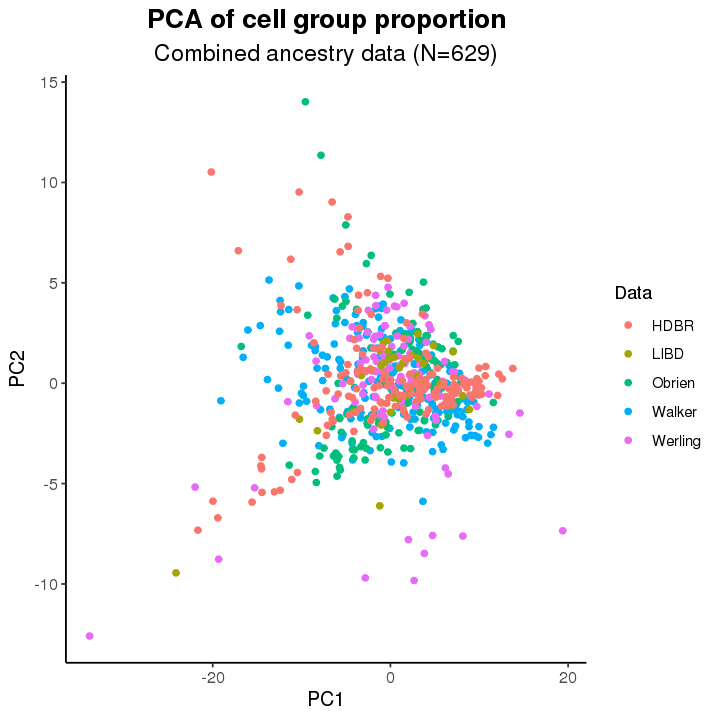

In [36]:
p <- ggplot(data, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of cell group proportion",
       subtitle = "Combined ancestry data (N=629)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p

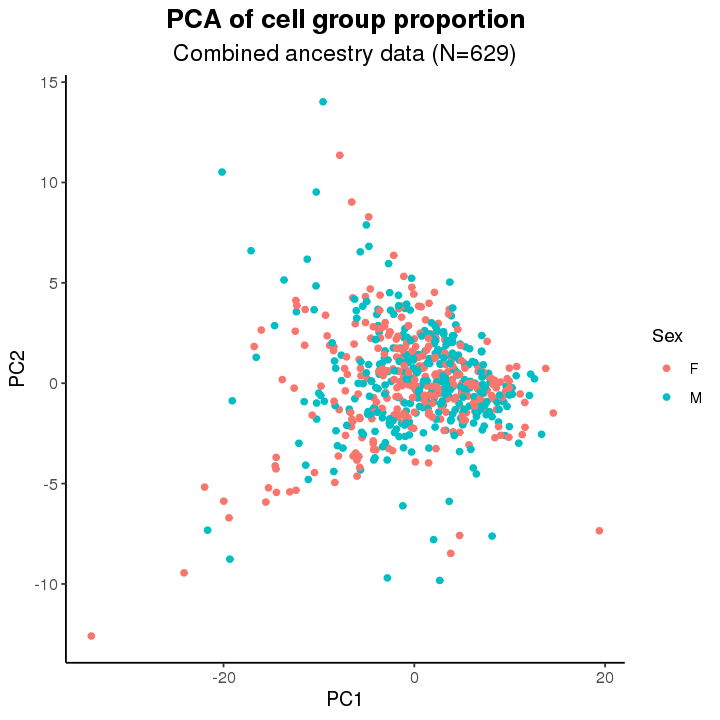

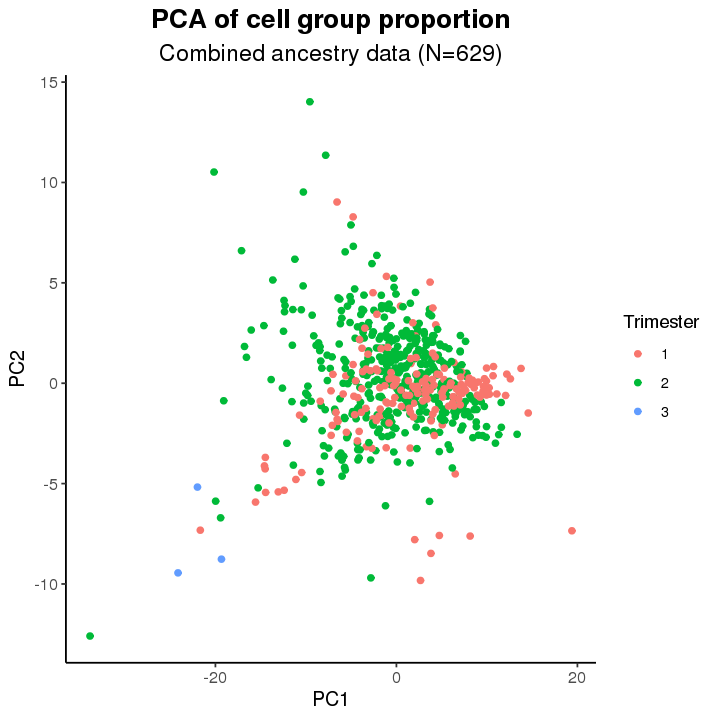

In [37]:
p <- ggplot(data, aes(x=PC1, y=PC2, color=Sex)) +
  geom_point() +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of cell group proportion",
       subtitle = "Combined ancestry data (N=629)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p

p <- ggplot(data, aes(x=PC1, y=PC2, color=Trimester)) +
  geom_point() +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of cell group proportion",
       subtitle = "Combined ancestry data (N=629)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p

** Investigate correlation with known and hidden covariates **

In [32]:
cov <- read.table("~/project-gandalm/isoform_twas/eqtl_new/data/90hcp_cov_629.txt", header = T, stringsAsFactors = F, check.names = F)
head(cov)
dim(cov)

,id,1474,1496,1500,1502,1507,1511,1513,1525,1531,⋯,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,PC1,0.00898199,-0.0076338,0.0111147,0.00487142,0.00960893,-0.01488,0.00883737,-0.0266981,-0.0253829,⋯,0.00967447,-0.0252683,0.00965381,0.00960237,0.00979039,0.00950035,0.00960529,0.00989866,0.00702467,0.00983834
2,PC2,-0.00035727,-0.000843408,-0.0158545,0.000257063,-0.00326613,-0.00113582,-0.00241496,-0.0022033,-0.00247448,⋯,-0.0208489,-0.00395539,-0.0206395,-0.0210822,-0.0204132,-0.0205727,-0.0206059,-0.0210826,0.0245783,-0.0205709
3,PC3,-0.0248268,-0.0141886,-0.0101601,-0.0222758,-0.020871,-0.00907471,-0.021557,-0.00118133,-0.00152521,⋯,-0.00482939,-0.00111922,-0.00453659,-0.00526304,-0.00508921,-0.00534413,-0.00518309,-0.00544843,-0.00538244,-0.00537699
4,PC4,-0.0321383,-0.0175555,-0.000733046,-0.0315899,-0.0245335,-0.0106596,-0.0266302,0.000414128,0.000549499,⋯,0.0229196,0.0138587,0.0222114,0.0226635,0.0214958,0.0226123,0.0221212,0.0239712,0.0252937,0.0216689
5,PC5,0.000571238,-0.00167298,-0.0126722,0.00128243,-0.00225702,-0.00145859,-0.00174134,-0.00474446,-0.00445944,⋯,0.0685564,0.0750816,0.0672512,0.0693604,0.0685406,0.06972,0.0690513,0.0679772,0.0693614,0.0681412
6,sex,M,F,M,M,M,M,M,M,F,⋯,F,F,F,M,F,F,F,M,F,F


[1]  97 630

In [33]:
rownames(cov) <- cov[,1]
cov <- cov[,-1]
head(cov)

,1474,1496,1500,1502,1507,1511,1513,1525,1531,1533,⋯,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
PC1,0.00898199,-0.0076338,0.0111147,0.00487142,0.00960893,-0.01488,0.00883737,-0.0266981,-0.0253829,0.00976202,⋯,0.00967447,-0.0252683,0.00965381,0.00960237,0.00979039,0.00950035,0.00960529,0.00989866,0.00702467,0.00983834
PC2,-0.00035727,-0.000843408,-0.0158545,0.000257063,-0.00326613,-0.00113582,-0.00241496,-0.0022033,-0.00247448,-0.0043343,⋯,-0.0208489,-0.00395539,-0.0206395,-0.0210822,-0.0204132,-0.0205727,-0.0206059,-0.0210826,0.0245783,-0.0205709
PC3,-0.0248268,-0.0141886,-0.0101601,-0.0222758,-0.020871,-0.00907471,-0.021557,-0.00118133,-0.00152521,-0.0192131,⋯,-0.00482939,-0.00111922,-0.00453659,-0.00526304,-0.00508921,-0.00534413,-0.00518309,-0.00544843,-0.00538244,-0.00537699
PC4,-0.0321383,-0.0175555,-0.000733046,-0.0315899,-0.0245335,-0.0106596,-0.0266302,0.000414128,0.000549499,-0.0225191,⋯,0.0229196,0.0138587,0.0222114,0.0226635,0.0214958,0.0226123,0.0221212,0.0239712,0.0252937,0.0216689
PC5,0.000571238,-0.00167298,-0.0126722,0.00128243,-0.00225702,-0.00145859,-0.00174134,-0.00474446,-0.00445944,-0.0030688,⋯,0.0685564,0.0750816,0.0672512,0.0693604,0.0685406,0.06972,0.0690513,0.0679772,0.0693614,0.0681412
sex,M,F,M,M,M,M,M,M,F,M,⋯,F,F,F,M,F,F,F,M,F,F


In [34]:
cov[cov=="M"] <- 1
cov[cov=="F"] <- 0
cov <- t(cov)
head(cov)
dim(cov)

,PC1,PC2,PC3,PC4,PC5,sex,HCP1,HCP2,HCP3,HCP4,⋯,HCP82,HCP83,HCP84,HCP85,HCP86,HCP87,HCP88,HCP89,HCP90,age
1474,0.00898199,-0.00035727,-0.0248268,-0.0321383,0.000571238,1,0.0248987147225461,-0.401997634050899,-0.33884445555104,-0.558893472578514,⋯,0.806579164745476,-0.373211239766462,0.585689641874528,-0.0612741826119798,-0.237375013396073,-0.418325592720121,-0.412796868830665,-1.00632175213629,0.298514162189047,-0.498630137
1496,-0.0076338,-0.000843408,-0.0141886,-0.0175555,-0.00167298,0,-0.208985057269171,0.131573623804841,0.478563783499163,-0.11900386313324,⋯,0.103387999513815,0.565281050842546,-0.0766377134453908,-0.00408769114250185,0.216584128998934,-0.183503571986192,-0.0503260797619607,-0.0565382852002944,0.0321118424205773,-0.4602739726
1500,0.0111147,-0.0158545,-0.0101601,-0.000733046,-0.0126722,1,-0.0312891977027799,-0.491298253057252,-0.181036900587301,-0.597895182555278,⋯,-0.181340918378643,-0.0903645066171107,0.115345682932084,0.144869882460216,0.114126633972523,-0.0142312881066862,0.254134263004162,-0.485068897362817,-0.092212973701157,-0.4794520548
1502,0.00487142,0.000257063,-0.0222758,-0.0315899,0.00128243,1,-0.0373365235787358,0.28310478706478,0.106188571042789,-0.163219644590632,⋯,0.0793513415704394,0.116106675138422,0.0627657755666487,0.401644540922854,-0.0296344555019935,0.124136140994352,-0.135869449706456,-0.0878922136079657,0.00116774015425269,-0.4410958904
1507,0.00960893,-0.00326613,-0.020871,-0.0245335,-0.00225702,1,0.153088955901054,-0.37830795779766,0.552591700085659,-0.46712058295241,⋯,-0.104551671673195,0.313111661107317,-0.234321738730192,0.287902870013192,0.187246113524656,0.192813532766908,0.163189902062365,0.0499749030682715,0.057380228433944,-0.4602739726
1511,-0.01488,-0.00113582,-0.00907471,-0.0106596,-0.00145859,1,-0.113457968530122,-0.376025819269365,-0.835084073366588,-0.729868115946387,⋯,0.367502934633531,-0.146135593296761,0.449091116773649,0.166787755624759,0.129887556557227,-0.488452791890299,-0.773682955910269,-0.579889250143889,0.424131323935765,-0.498630137


[1] 629  97

In [35]:
cov <- as.data.frame(cov)

In [36]:
cov <- cov %>% select(PC1, PC2, PC3, PC4, PC5, sex, HCP1, HCP2, HCP3, HCP4, HCP5, HCP6, HCP7, HCP8, HCP9, HCP10, age)

In [43]:
combine <- cbind(cov, prop)
head(combine)

,PC1,PC2,PC3,PC4,PC5,sex,HCP1,HCP2,HCP3,HCP4,⋯,HCP10,age,CG1,CG2,CG3,CG4,CG5,CG6,CG7,CG8
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1474,0.00898199,-0.00035727,-0.0248268,-0.0321383,0.000571238,1,0.0248987147225461,-0.401997634050899,-0.33884445555104,-0.558893472578514,⋯,0.162300529106956,-0.498630137,0.04017111,0.05003045,0.8433628,0.01809225,0.009991192,0.019233263,0.012685359,0.006433612
1496,-0.0076338,-0.000843408,-0.0141886,-0.0175555,-0.00167298,0,-0.208985057269171,0.131573623804841,0.478563783499163,-0.11900386313324,⋯,0.286893560608606,-0.4602739726,0.03116547,0.07400348,0.7812348,0.04830811,0.048907356,0.009282987,0.005818009,0.001279827
1500,0.0111147,-0.0158545,-0.0101601,-0.000733046,-0.0126722,1,-0.0312891977027799,-0.491298253057252,-0.181036900587301,-0.597895182555278,⋯,0.427223068951567,-0.4794520548,0.04861597,0.06171541,0.8205906,0.02089644,0.022517391,0.014239824,0.007700926,0.003723463
1502,0.00487142,0.000257063,-0.0222758,-0.0315899,0.00128243,1,-0.0373365235787358,0.28310478706478,0.106188571042789,-0.163219644590632,⋯,0.168777219287629,-0.4410958904,0.08178062,0.06638560,0.7772764,0.03118620,0.024647407,0.010832914,0.006551114,0.001339696
1507,0.00960893,-0.00326613,-0.020871,-0.0245335,-0.00225702,1,0.153088955901054,-0.37830795779766,0.552591700085659,-0.46712058295241,⋯,0.397467437057801,-0.4602739726,0.03725752,0.07767799,0.7847484,0.03960730,0.045230144,0.010722032,0.003115286,0.001641290
1511,-0.01488,-0.00113582,-0.00907471,-0.0106596,-0.00145859,1,-0.113457968530122,-0.376025819269365,-0.835084073366588,-0.729868115946387,⋯,0.56772536617224,-0.498630137,0.03070350,0.03529335,0.8728747,0.01473825,0.008845729,0.018686553,0.011514965,0.007342982


In [44]:
combine.temp <- apply(combine, 2, as.numeric)
head(combine.temp)

PC1,PC2,PC3,PC4,PC5,sex,HCP1,HCP2,HCP3,HCP4,⋯,HCP10,age,CG1,CG2,CG3,CG4,CG5,CG6,CG7,CG8
0.00898199,-0.000357270,-0.02482680,-0.032138300,0.000571238,1,0.02489871,-0.4019976,-0.3388445,-0.5588935,⋯,0.1623005,-0.4986301,0.04017111,0.05003045,0.8433628,0.01809225,0.009991192,0.019233263,0.012685359,0.006433612
-0.00763380,-0.000843408,-0.01418860,-0.017555500,-0.001672980,0,-0.20898506,0.1315736,0.4785638,-0.1190039,⋯,0.2868936,-0.4602740,0.03116547,0.07400348,0.7812348,0.04830811,0.048907356,0.009282987,0.005818009,0.001279827
0.01111470,-0.015854500,-0.01016010,-0.000733046,-0.012672200,1,-0.03128920,-0.4912983,-0.1810369,-0.5978952,⋯,0.4272231,-0.4794521,0.04861597,0.06171541,0.8205906,0.02089644,0.022517391,0.014239824,0.007700926,0.003723463
0.00487142,0.000257063,-0.02227580,-0.031589900,0.001282430,1,-0.03733652,0.2831048,0.1061886,-0.1632196,⋯,0.1687772,-0.4410959,0.08178062,0.06638560,0.7772764,0.03118620,0.024647407,0.010832914,0.006551114,0.001339696
0.00960893,-0.003266130,-0.02087100,-0.024533500,-0.002257020,1,0.15308896,-0.3783080,0.5525917,-0.4671206,⋯,0.3974674,-0.4602740,0.03725752,0.07767799,0.7847484,0.03960730,0.045230144,0.010722032,0.003115286,0.001641290
-0.01488000,-0.001135820,-0.00907471,-0.010659600,-0.001458590,1,-0.11345797,-0.3760258,-0.8350841,-0.7298681,⋯,0.5677254,-0.4986301,0.03070350,0.03529335,0.8728747,0.01473825,0.008845729,0.018686553,0.011514965,0.007342982


In [45]:
combine.temp <- as.data.frame(combine.temp)
row.names(combine.temp) <- row.names(combine)
head(combine.temp)

,PC1,PC2,PC3,PC4,PC5,sex,HCP1,HCP2,HCP3,HCP4,⋯,HCP10,age,CG1,CG2,CG3,CG4,CG5,CG6,CG7,CG8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1474,0.00898199,-0.000357270,-0.02482680,-0.032138300,0.000571238,1,0.02489871,-0.4019976,-0.3388445,-0.5588935,⋯,0.1623005,-0.4986301,0.04017111,0.05003045,0.8433628,0.01809225,0.009991192,0.019233263,0.012685359,0.006433612
1496,-0.00763380,-0.000843408,-0.01418860,-0.017555500,-0.001672980,0,-0.20898506,0.1315736,0.4785638,-0.1190039,⋯,0.2868936,-0.4602740,0.03116547,0.07400348,0.7812348,0.04830811,0.048907356,0.009282987,0.005818009,0.001279827
1500,0.01111470,-0.015854500,-0.01016010,-0.000733046,-0.012672200,1,-0.03128920,-0.4912983,-0.1810369,-0.5978952,⋯,0.4272231,-0.4794521,0.04861597,0.06171541,0.8205906,0.02089644,0.022517391,0.014239824,0.007700926,0.003723463
1502,0.00487142,0.000257063,-0.02227580,-0.031589900,0.001282430,1,-0.03733652,0.2831048,0.1061886,-0.1632196,⋯,0.1687772,-0.4410959,0.08178062,0.06638560,0.7772764,0.03118620,0.024647407,0.010832914,0.006551114,0.001339696
1507,0.00960893,-0.003266130,-0.02087100,-0.024533500,-0.002257020,1,0.15308896,-0.3783080,0.5525917,-0.4671206,⋯,0.3974674,-0.4602740,0.03725752,0.07767799,0.7847484,0.03960730,0.045230144,0.010722032,0.003115286,0.001641290
1511,-0.01488000,-0.001135820,-0.00907471,-0.010659600,-0.001458590,1,-0.11345797,-0.3760258,-0.8350841,-0.7298681,⋯,0.5677254,-0.4986301,0.03070350,0.03529335,0.8728747,0.01473825,0.008845729,0.018686553,0.011514965,0.007342982


In [46]:
res <- cor(combine.temp, method = "pearson")
head(res)

,PC1,PC2,PC3,PC4,PC5,sex,HCP1,HCP2,HCP3,HCP4,⋯,HCP10,age,CG1,CG2,CG3,CG4,CG5,CG6,CG7,CG8
PC1,1.00000000,-0.33662656,-0.262173444,0.02936346,0.08473553,-0.009574840,-0.044373235,-0.004442264,0.016899334,-0.062809789,⋯,-0.08941869,-0.13114557,0.06328340,0.005346411,-0.059486685,0.025357013,0.052724065,0.021222016,-0.012066719,-0.03118828
PC2,-0.33662656,1.00000000,-0.220885763,-0.50926248,-0.16565542,0.023103376,0.016728102,-0.062025287,-0.004366530,0.055270087,⋯,0.04647975,0.24905560,-0.08906337,-0.024653024,0.075223965,-0.015663357,-0.089498701,-0.014360620,0.054793475,-0.02609907
PC3,-0.26217344,-0.22088576,1.000000000,0.65568294,0.22823609,0.001657962,0.007431780,0.014165178,0.034217295,0.010073691,⋯,0.09750982,-0.26690848,-0.02824831,0.031017507,0.015947112,-0.002256302,-0.064224903,0.006269050,0.029261897,-0.01192160
PC4,0.02936346,-0.50926248,0.655682939,1.00000000,0.41551994,-0.060750765,0.009389170,0.009595604,-0.008333441,-0.000574730,⋯,0.04252082,-0.42800826,0.03143921,-0.017471179,-0.040893051,0.036583817,0.002358077,0.040677369,0.005539566,0.03579910
PC5,0.08473553,-0.16565542,0.228236091,0.41551994,1.00000000,-0.100237063,-0.004927716,-0.015444264,-0.001898847,-0.001928777,⋯,-0.00267525,-0.67918611,0.01742819,-0.019756230,0.001482436,-0.001895432,0.018656876,0.001716543,-0.051833288,0.02091081
sex,-0.00957484,0.02310338,0.001657962,-0.06075076,-0.10023706,1.000000000,-0.050569227,0.033091778,-0.008579103,-0.076686484,⋯,-0.07534467,0.05885127,-0.01084940,-0.017875336,0.076877243,-0.081382311,-0.020103996,-0.072373311,-0.010801920,0.03726249


In [47]:
library(reshape2)
res_melted <- melt(res)
head(res_melted)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,PC1,PC1,1.00000000
2,PC2,PC1,-0.33662656
3,PC3,PC1,-0.26217344
4,PC4,PC1,0.02936346
5,PC5,PC1,0.08473553
6,sex,PC1,-0.00957484


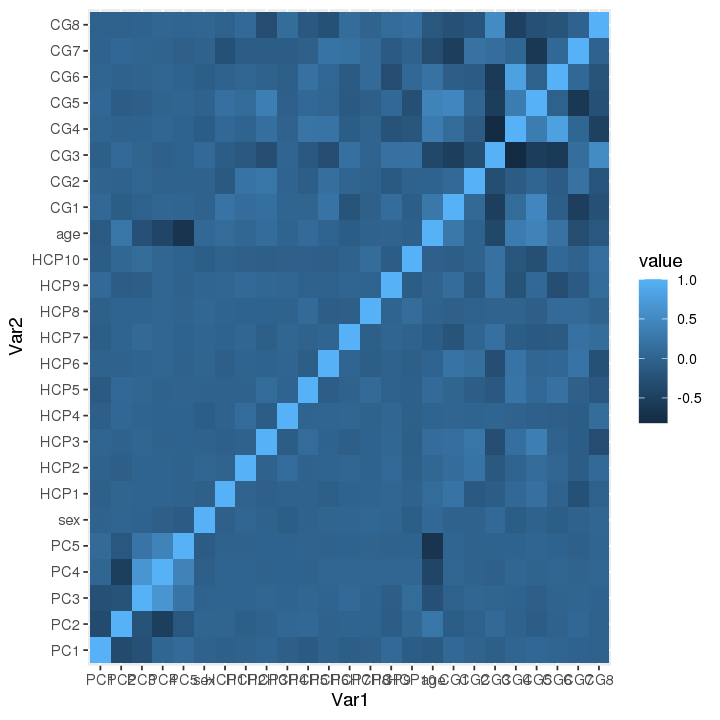

In [48]:
ggplot(res_melted, aes(x=Var1, y=Var2, fill=value)) +
    geom_tile()

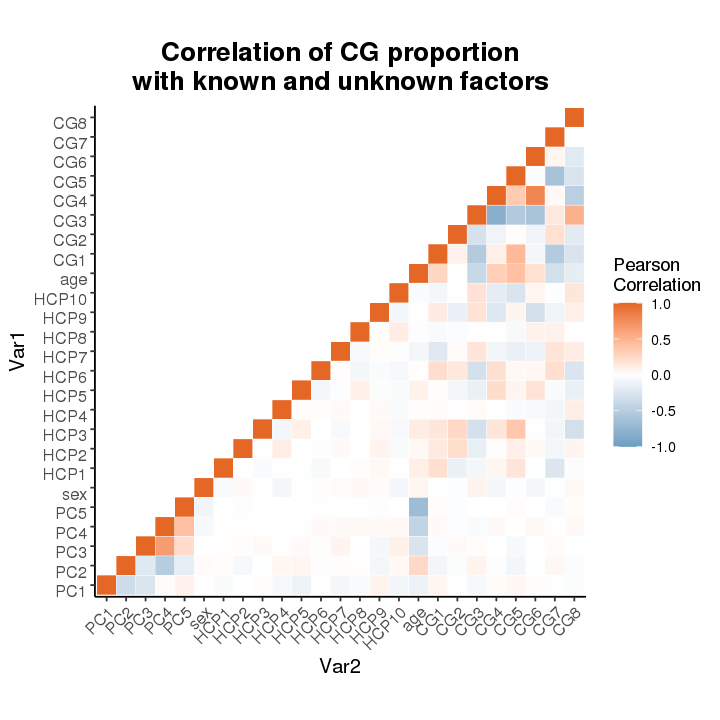

In [51]:
res[lower.tri(res)] <- NA
upper.melted <- melt(res, na.rm = TRUE)

p <- ggplot(data = upper.melted, aes(Var2, Var1, fill = value)) +
 geom_tile(color = "white") +
 scale_fill_gradient2(low = "#6D9EC1", high = "#E46726", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
 theme_classic() + 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 10, hjust = 1),
       axis.text.y = element_text(vjust = 1, 
    size = 10, hjust = 1),
       axis.title = element_text(size=12),
       plot.title = element_text(size=16, face="bold", hjust = 0.5)) +
 ggtitle("Correlation of CG proportion\nwith known and unknown factors") +
 coord_fixed()
p

In [52]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/CG_corr.png", height = 6, width = 6)

### Decon-cell example data. What is the format of `--expression` ?

In [8]:
library(matrixStats)
library(DeconCell)
library(truncnorm)

data("count.table")

# take the row means and row standard deviation of the vignette samples
rMeans <- rowMeans(count.table)
rSD <- rowSds(as.matrix(count.table))
names(rSD) <- names(rMeans)
means_and_SD <- data.frame(mean=rMeans, SD=rSD)

# number of samples to simulate
number_of_samples <- 100

# make sample names
sampleNames <- c()
for(i in 1:number_of_samples) {
  sampleNames <- c(sampleNames, paste0('sample_', i))
}

# For every gene sample from same mean and SD as vignette samples
# with expression >= 0
new_count_table <- data.frame(t(apply(
	means_and_SD, 1, function(x) rtruncnorm(number_of_samples, a=0,
	                                        mean=x[['mean']],
	                                        sd=x[['SD']]))
	))
colnames(new_count_table) <- sampleNames

# set NA's to 0
new_count_table[is.na(new_count_table)] <- 0
# # Write the simulated data to a file
# write.table(new_count_table, 
# 			  'example_data/count.table.simulated.txt', 
# 			  sep='\t',quote=F,col.names=NA)

In [9]:
head(new_count_table)

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,⋯,sample_91,sample_92,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99,sample_100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,17.22240,6.829255,26.62762,16.77952,22.98676,11.34279,21.88490,10.51159,3.886654,27.93372,⋯,13.45302,1.649822,16.85949,15.68314,13.81579,13.93459,1.580394,21.62234,7.023492,22.02029
ENSG00000000419,161.09594,180.007638,165.66874,160.14069,279.81266,300.55522,228.98459,195.31037,284.953913,307.86525,⋯,247.58851,180.509754,166.78998,177.00642,293.75060,211.31787,327.981338,257.41106,160.484890,234.91682
ENSG00000000457,272.15381,350.514701,272.21966,284.09253,205.76308,232.34143,258.46510,257.14467,350.873086,276.04405,⋯,233.97039,327.672520,179.71290,271.03952,238.89505,288.82059,210.752285,284.26609,172.008439,232.17002
ENSG00000000460,24.52894,36.224016,31.93332,33.13406,47.06782,40.64835,42.78657,49.27730,41.739813,37.90226,⋯,22.02990,37.261320,32.44647,20.70347,38.91590,34.26423,33.609570,28.67757,40.136332,43.29438
ENSG00000000938,17583.36773,13007.986549,6908.33997,11306.76783,15811.42051,15470.91672,16690.85677,11382.65684,12152.988759,13877.81318,⋯,15607.96718,19417.814100,15744.40833,14750.42355,12083.67405,13213.62684,9129.521058,10299.58881,14817.462904,1179.23961
ENSG00000000971,19.84510,26.538079,26.54702,26.21703,29.10348,23.76571,24.61586,21.07409,27.770515,24.74394,⋯,23.32485,23.847729,29.90600,22.99352,27.68887,24.73123,26.419832,21.78779,26.119895,24.45503


In [18]:
bulk.decon <- bulk[,4:646]
head(bulk.decon)
dim(bulk.decon)

,ID,1474,1496,1500,1502,1507,1511,1513,1525,1531,⋯,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000223972,3.135499,3.860746,2.991053,3.402323,1.683311,2.979528,1.683311,1.683311,3.583774,⋯,3.545430,2.794408,3.219573,3.270080,3.033587,3.719546,3.528669,1.795879,1.795879,1.795879
2,ENSG00000243485,2.019259,2.019259,3.337607,3.284138,2.019259,4.117352,2.019259,2.019259,2.019259,⋯,1.739895,1.739895,3.364551,2.579396,3.357388,2.792396,2.825834,3.070580,3.492360,2.796174
3,ENSG00000227232,7.976420,7.983908,8.418516,8.327781,7.848723,8.723322,8.047395,8.643141,8.822918,⋯,6.898168,8.165533,9.093119,7.508564,8.412931,8.818620,7.683092,8.549899,7.261408,7.765424
4,ENSG00000237613,3.965445,4.274929,4.684834,4.872262,4.790440,3.521006,4.333095,4.779410,5.227346,⋯,2.993636,4.926470,2.993636,2.993636,2.993636,2.993636,2.993636,5.123510,2.993636,2.993636
5,ENSG00000239945,1.850485,3.306370,2.977209,3.985883,1.850485,1.850485,1.850485,1.850485,1.850485,⋯,2.157703,2.157703,2.157703,3.728385,5.165983,3.846017,2.157703,2.157703,2.157703,4.511053
6,ENSG00000233750,4.110258,4.971833,4.274072,4.756833,5.022698,3.450271,4.377471,3.433721,4.665800,⋯,4.431115,4.068149,4.380002,3.577251,3.459137,4.259683,3.918486,3.981142,4.821110,5.015399


[1] 31947   643

In [20]:
rownames(bulk.decon) <- bulk.decon$ID
bulk.decon <- bulk.decon[, -1]
bulk.decon <- bulk.decon[, !colnames(bulk.decon) %in% rel]
dim(bulk.decon)
head(bulk.decon)

[1] 31947   629

,1474,1496,1500,1502,1507,1511,1513,1525,1531,1533,⋯,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972,3.135499,3.860746,2.991053,3.402323,1.683311,2.979528,1.683311,1.683311,3.583774,1.683311,⋯,3.545430,2.794408,3.219573,3.270080,3.033587,3.719546,3.528669,1.795879,1.795879,1.795879
ENSG00000243485,2.019259,2.019259,3.337607,3.284138,2.019259,4.117352,2.019259,2.019259,2.019259,2.019259,⋯,1.739895,1.739895,3.364551,2.579396,3.357388,2.792396,2.825834,3.070580,3.492360,2.796174
ENSG00000227232,7.976420,7.983908,8.418516,8.327781,7.848723,8.723322,8.047395,8.643141,8.822918,7.658501,⋯,6.898168,8.165533,9.093119,7.508564,8.412931,8.818620,7.683092,8.549899,7.261408,7.765424
ENSG00000237613,3.965445,4.274929,4.684834,4.872262,4.790440,3.521006,4.333095,4.779410,5.227346,-0.483929,⋯,2.993636,4.926470,2.993636,2.993636,2.993636,2.993636,2.993636,5.123510,2.993636,2.993636
ENSG00000239945,1.850485,3.306370,2.977209,3.985883,1.850485,1.850485,1.850485,1.850485,1.850485,4.087958,⋯,2.157703,2.157703,2.157703,3.728385,5.165983,3.846017,2.157703,2.157703,2.157703,4.511053
ENSG00000233750,4.110258,4.971833,4.274072,4.756833,5.022698,3.450271,4.377471,3.433721,4.665800,4.482790,⋯,4.431115,4.068149,4.380002,3.577251,3.459137,4.259683,3.918486,3.981142,4.821110,5.015399


In [22]:
write.table(bulk.decon, "~/project-gandalm/isoform_twas/eqtl_new/data/cell_specific/bulk_expr.tsv", col.names = T, row.names = T, quote = F, sep = "\t")

### Prepare `--genotype` (see Snakefile)

Prepare geontype dosage file based on susie dosage. See Snakefile for code. Here add headers to bim.

In [54]:
bim <- fread("/u/project/gandalm/cindywen/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/filtered.hg19.sorted.bim", data.table = F)

In [55]:
head(bim)

,V1,V2,V3,V4,V5,V6
,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,1,rs61769339,0,662622,A,G
2,1,rs200188737,0,666249,T,C
3,1,rs12238997,0,693731,G,A
4,1,rs61769351,0,693823,C,G
5,1,rs142559957,0,704637,A,G
6,1,rs142576295,0,708075,G,A


In [56]:
names(bim) <- c("CHR", "ID", "dummy", "POS", "MINOR", "MAJOR")

In [60]:
write.table(bim, "/u/project/gandalm/cindywen/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/filtered.hg19.sorted.bim.header", col.names = T, row.names = F, quote = F, sep = "\t")

### Prepare `--snpsToTest` 

In [40]:
# this is top variants per rank of all expressed genes
cond <- read.table("~/project-gandalm/isoform_twas/eqtl_new/results/mixed_conditional_90hcp/conditional_top_variants.txt", hea = F, stringsAsFactors = F)

In [41]:
# filter for variants with backward p-val below threshold of the gene
cond <- cond %>% filter(V20 == 1)

In [42]:
dim(cond)
head(cond)

[1] 17239    20

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,ENSG00000225231,12,10096094,10096094,+,5720,-8,rs74065411,12,10096086,10096086,0,3.07451e-92,1.843920,1,1,1.72174e-48,1.245000,1,1
2,ENSG00000225231,12,10096094,10096094,+,5720,26397,rs117342025,12,10122491,10122491,1,1.48906e-06,1.247380,0,1,5.24278e-06,1.181680,1,1
3,ENSG00000225231,12,10096094,10096094,+,5720,74067,rs1054611,12,10170161,10170161,2,1.26199e-05,-0.238055,1,1,2.18747e-05,-0.231514,1,1
4,ENSG00000225231,12,10096094,10096094,+,5720,420204,chr12:10363699,12,10516298,10516302,3,1.97689e-05,-1.042710,1,1,2.34256e-06,-1.151750,1,1
5,ENSG00000225231,12,10096094,10096094,+,5720,664530,rs10845180,12,10760624,10760624,4,5.37902e-05,-0.251489,1,1,5.37902e-05,-0.251489,1,1
6,ENSG00000173391,12,10324737,10324737,+,6210,-14018,rs34874375,12,10310719,10310719,0,9.87270e-08,-0.112123,1,1,9.87270e-08,-0.112123,1,1


In [43]:
# filter for primary, secondary, tertiary, qauternary
cond <- cond %>% filter(V12 <= 3)
dim(cond)

[1] 17005    20

In [44]:
cond <- cond %>% select(V1, V8)
names(cond) <- c("gene", "snp")
head(cond)

,gene,snp
,<chr>,<chr>
1,ENSG00000225231,rs74065411
2,ENSG00000225231,rs117342025
3,ENSG00000225231,rs1054611
4,ENSG00000225231,chr12:10363699
5,ENSG00000173391,rs34874375
6,ENSG00000139112,rs11053689


In [45]:
dim(cond)
library(plyr)
freq.df <- count(cond) 

[1] 17005     2

In [46]:
head(freq.df)

,gene,snp,freq
,<chr>,<chr>,<int>
1,ENSG00000000419,rs192563417,1
2,ENSG00000000460,rs12135057,1
3,ENSG00000000460,rs17529513,1
4,ENSG00000001036,rs11754096,1
5,ENSG00000001036,rs4896658,1
6,ENSG00000001460,rs2223503,1


In [47]:
table(freq.df$freq)


    1     2 
16995     5 

In [48]:
freq.df %>% filter(freq==2)

gene,snp,freq
<chr>,<chr>,<int>
ENSG00000198912,rs12753572,2
ENSG00000228716,rs863216,2
ENSG00000255284,rs112509990,2
ENSG00000263913,rs34811727,2
ENSG00000267198,rs74521229,2


In [49]:
# I don't know why variant rs12753572 is the top variant in both rank 1 and rank 2
cond %>% filter(gene == "ENSG00000198912")

gene,snp
<chr>,<chr>
ENSG00000198912,rs12753572
ENSG00000198912,rs12753572
ENSG00000198912,rs6672335


In [50]:
freq.df.unique <- freq.df %>% filter(freq == 1)
head(freq.df.unique)
dim(freq.df.unique)

,gene,snp,freq
,<chr>,<chr>,<int>
1,ENSG00000000419,rs192563417,1
2,ENSG00000000460,rs12135057,1
3,ENSG00000000460,rs17529513,1
4,ENSG00000001036,rs11754096,1
5,ENSG00000001036,rs4896658,1
6,ENSG00000001460,rs2223503,1


[1] 16995     3

In [51]:
cond.df.unique <- freq.df.unique %>% select(gene, snp)

In [53]:
write.table(cond.df.unique, "~/project-gandalm/isoform_twas/eqtl_new/data/cell_specific/gene_snp_file.txt", col.names = T, row.names = F, quote = F, sep = "\t")

## 3. Decon-QTL results (tested 16995 gene-SNP pairs)

In [8]:
out <- fread("~/project-gandalm/isoform_twas/eqtl_new/results/mixed_deconQTL/deconvolutionResults.csv", data.table = F)

In [54]:
dim(out)
head(out)

[1] 16995    25

,V1,CG1_pvalue,CG2_pvalue,CG3_pvalue,CG4_pvalue,CG5_pvalue,CG6_pvalue,CG7_pvalue,CG8_pvalue,Beta1_CG1,⋯,Beta7_CG7,Beta8_CG8,Beta9_CG1:GT,Beta10_CG2:GT,Beta11_CG3:GT,Beta12_CG4:GT,Beta13_CG5:GT,Beta14_CG6:GT,Beta15_CG7:GT,Beta16_CG8:GT
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000016082_rs16879255,0.4283581,0.9999997,0.7669907717,0.9999996,1.00000000,0.9252562,0.38772027,1.000000000,0.00000000,⋯,0.7053005,0.0000000,-1.490354e-02,0.000000000,1.146344e-03,0.000000000,0.000000000,-0.005248590,-0.079674814,0.00000000
2,ENSG00000179029_rs112502892,0.3472783,0.3795743,0.0004140886,0.9999998,0.09870626,0.5822726,0.09161408,0.001923478,0.04747134,⋯,0.0469590,0.9359678,1.219032e-02,0.014622093,-5.316364e-03,0.000000000,0.044667760,0.016932301,0.079892214,0.42647422
3,ENSG00000115839_rs62170242,0.7428368,0.4278697,0.9103142012,0.2147163,1.00000000,0.7828739,1.00000000,0.772493101,0.10064365,⋯,0.0000000,0.3695145,-2.014229e-03,-0.005994247,-8.472747e-05,0.010718136,0.000000000,-0.004345071,0.000000000,-0.02449362
4,ENSG00000103852_chr15:99233065,0.9939564,0.1756952,0.3551320085,0.9999993,0.62107536,0.9999992,1.00000000,0.273879342,0.06743744,⋯,0.0000000,0.7330787,-6.404501e-05,-0.015344514,1.092265e-03,0.000000000,-0.005034533,0.000000000,0.000000000,-0.13201652
5,ENSG00000180011_rs1440298,0.8221430,0.9999996,0.9999997466,0.6355331,1.00000000,0.9999996,0.14663605,0.506346083,0.14833427,⋯,0.1752025,0.0000000,-1.802585e-03,0.000000000,0.000000e+00,-0.003888672,0.000000000,0.000000000,-0.043975876,0.20264481
6,ENSG00000103855_chr15:73716885,0.7337462,1.0000000,0.9999996096,0.1734374,0.49417892,0.3960655,0.76782796,1.000000000,0.08462132,⋯,0.1471386,0.0000000,2.076583e-03,0.000000000,0.000000e+00,-0.014968746,0.007340906,0.015095212,0.004265732,0.00000000


- ** column 2-9: p-values for each of the cell types. To be FDR/BH corrected **
- ** column 10-17: betas for each of the cell types **
- ** column 18-25: betas of the cell type - genotype interaction effect, relative to the allele that is coded as 2 in the dosage file **

In [9]:
out$CG1_pvalue_fdr <- p.adjust(out$CG1_pvalue, method = 'fdr')
out$CG2_pvalue_fdr <- p.adjust(out$CG2_pvalue, method = 'fdr')
out$CG3_pvalue_fdr <- p.adjust(out$CG3_pvalue, method = 'fdr')
out$CG4_pvalue_fdr <- p.adjust(out$CG4_pvalue, method = 'fdr')
out$CG5_pvalue_fdr <- p.adjust(out$CG5_pvalue, method = 'fdr')
out$CG6_pvalue_fdr <- p.adjust(out$CG6_pvalue, method = 'fdr')
out$CG7_pvalue_fdr <- p.adjust(out$CG7_pvalue, method = 'fdr')
out$CG8_pvalue_fdr <- p.adjust(out$CG8_pvalue, method = 'fdr')

In [56]:
sum(complete.cases(out))

[1] 16995

In [57]:
sum(out$CG1_pvalue_fdr <= 0.05)
sum(out$CG2_pvalue_fdr <= 0.05)
sum(out$CG3_pvalue_fdr <= 0.05)
sum(out$CG4_pvalue_fdr <= 0.05)
sum(out$CG5_pvalue_fdr <= 0.05)
sum(out$CG6_pvalue_fdr <= 0.05)
sum(out$CG7_pvalue_fdr <= 0.05)
sum(out$CG8_pvalue_fdr <= 0.05)

[1] 1

[1] 5

[1] 171

[1] 0

[1] 2

[1] 0

[1] 9

[1] 9

In [2]:
df <- data.frame("group" = paste0("CG", seq(1,8)),
                "count" = c(1, 5, 171, 0, 2, 0, 9, 9))
df

group,count
<fct>,<dbl>
CG1,1
CG2,5
CG3,171
CG4,0
CG5,2
CG6,0
CG7,9
CG8,9


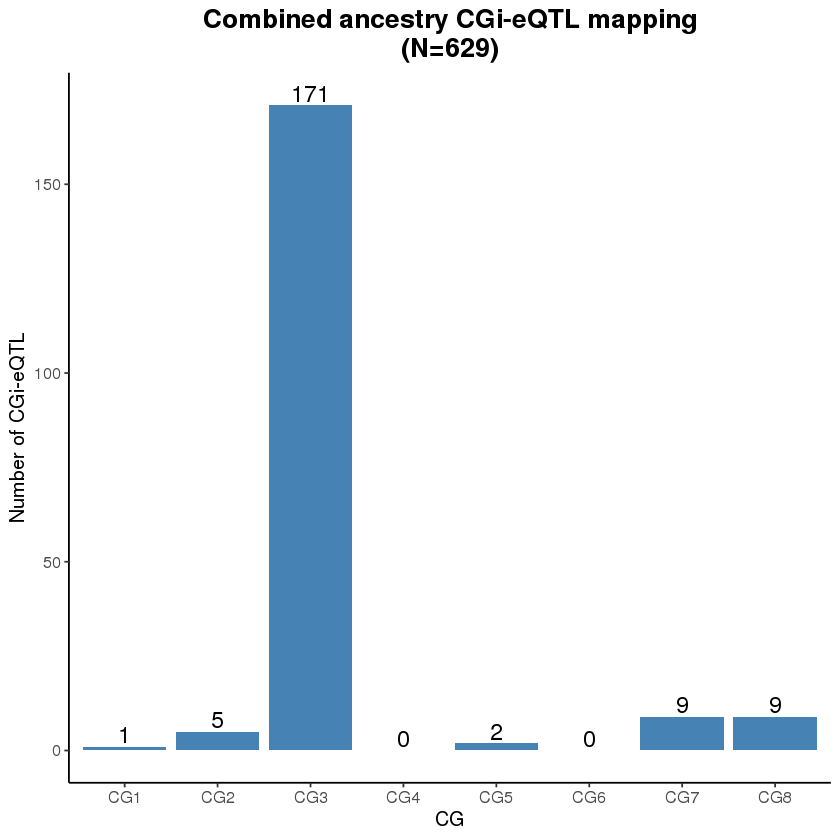

In [6]:
p <- ggplot(df, aes(x=group, y=count, label=count)) + 
    geom_bar(stat = "identity", fill = "steelblue") +
    geom_text(size=5, vjust = -0.2) +
  labs(x = "CG", y = "Number of CGi-eQTL", 
       title = "Combined ancestry CGi-eQTL mapping\n(N=629)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p

## 4. CG-specific cis-eQTL results

In [4]:
df <- data.frame('HCP' = rep(seq(10, 100, 10),8),
                 'Count' = NA,
                 'Group' = c(rep("CG1", 10), rep("CG2", 10), rep("CG3", 10), rep("CG4", 10),
                            rep("CG5", 10), rep("CG6", 10), rep("CG7", 10), rep("CG8", 10)))

In [7]:
for (i in c(1:8)) {
    for(j in seq(10, 100, 10)) {
        df[(i-1)*10+(j-10)/10+1, 'Count'] <- read.table(paste0("~/project-gandalm/isoform_twas/eqtl_new/results/CG_",
                                                               i,"_mixed_nominal_",j,"hcp/significant_feature_count.txt"))[,1]
    }
}

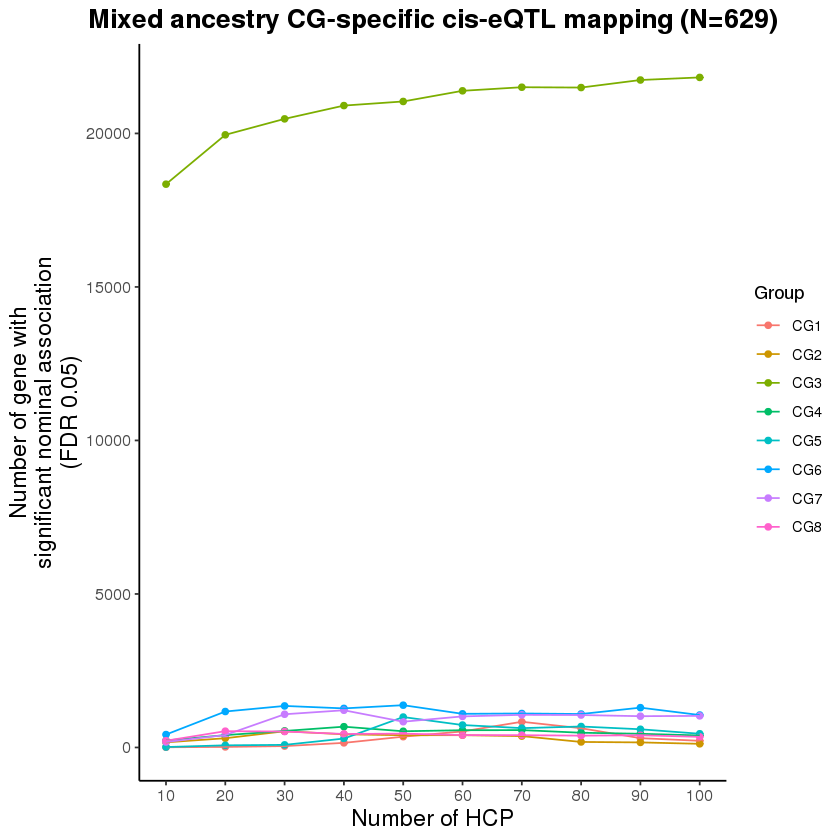

In [10]:
p <- ggplot(df) + 
    geom_point(aes(x=HCP, y=Count, color = Group)) +
    geom_line(aes(x=HCP, y=Count, color = Group)) +
    scale_x_continuous(breaks = seq(0, 110, by = 10)) +
    labs(title = "Mixed ancestry CG-specific cis-eQTL mapping (N=629)",
         x = "Number of HCP",
         y = "Number of gene with\nsignificant nominal association\n(FDR 0.05)") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
          axis.title = element_text(size=14),
          plot.title = element_text(size=16, face="bold", hjust = 0.5))
p

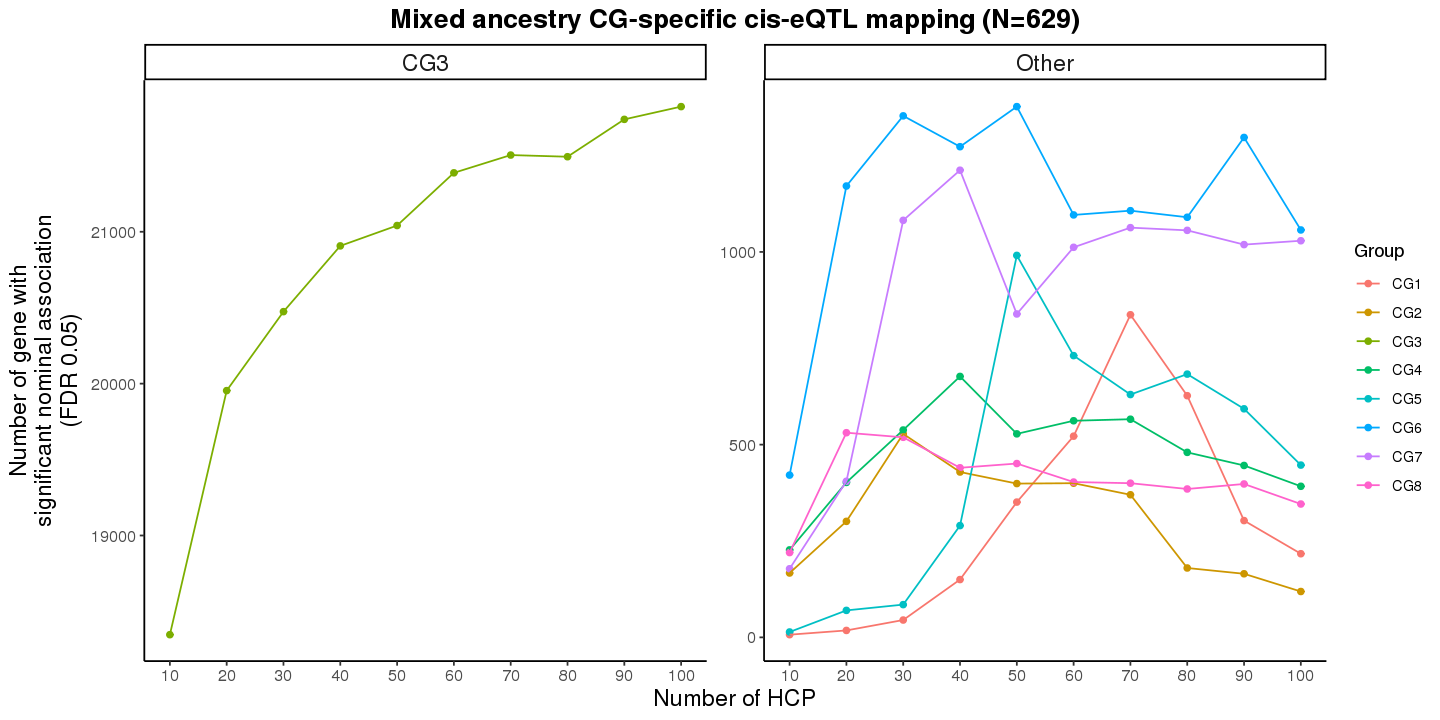

In [24]:
options(repr.plot.width=12, repr.plot.height=6)
df$facet <- ifelse(df$Group == "CG3", "CG3", "Other")
p <- ggplot(df, aes(x=HCP, y=Count, color=Group)) +
  geom_point() +
  geom_line() +
  scale_x_continuous(breaks = seq(0, 110, by = 10)) +
  facet_wrap(~facet, scales = "free") +
  labs(title = "Mixed ancestry CG-specific cis-eQTL mapping (N=629)",
         x = "Number of HCP",
         y = "Number of gene with\nsignificant nominal association\n(FDR 0.05)") +
    theme_classic() +
    theme(axis.text = element_text(size=10),
          axis.title = element_text(size=14),
          plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p